# **Purpose and Scope of the Analysis**  
The purpose of this analysis is to perform clustering on a dataset related to Highly Pathogenic Avian Influenza (HPAI) transmission events. The analysis aims to identify distinct groups or clusters within the data based on various characteristics such as location, species, flock size, and number of birds affected.

---

## **Data Overview**  
The notebook loads four CSV files containing HPAI-related data:

- `hpai-flocks.csv`  
- `hpai-livestock.csv`  
- `hpai-mammals.csv`  
- `hpai-wild-birds.csv`  

These files are merged into a single DataFrame called `hpai_data`, which serves as the primary dataset for the analysis.

**The dataset contains the following key features:**  
- `State`: The state where the HPAI event occurred.  
- `County`: The county where the HPAI event occurred.  
- `Species Name`: The species affected by the HPAI event.  
- `Flock Size`: The size of the affected flock or herd.  
- `Birds Affected`: The number of birds affected by the HPAI event.  
- `HPAI Strain`: The specific strain of the HPAI virus involved.  
- `Source`: The source of the HPAI event (`Flocks`, `Livestock`, `Mammals`, or `Wild Birds`).  

---

## **Modeling and Analytical Approach**  

### **1. Data Preprocessing:**  
- Handling missing values by:  
  - Filling numerical features with `0`  
  - Filling categorical features with `"Unknown"`  
- Encoding categorical variables using `LabelEncoder`  
- Standardizing numerical features using `StandardScaler`  

### **2. Optimal Number of Clusters:**  
- The **"Elbow Method"** is used to determine the optimal number of clusters.  
- The elbow point in the plot indicates the optimal number of clusters is **4**.  

### **3. K-Means Clustering:**  
- **K-Means clustering** is performed on the standardized data, with the number of clusters set to **4** (as determined by the elbow method).  
- The cluster assignments are added as a new column (`cluster`) to the `hpai_data` DataFrame.  

### **4. Cluster Analysis:**  
- A summary of cluster characteristics is provided, including the mean values for each feature within each cluster.  

---

## **Visualizations**  

### **1. Elbow Method Plot:**  
- Displays the "Inertia" (sum of squared distances of samples to their assigned cluster centers) for different numbers of clusters (`k`).  
- The "elbow" in the plot, indicating the optimal number of clusters, is observed at **k = 4**.  

---

## **Key Findings and Conclusions**  

The analysis identified **4 distinct clusters** within the HPAI data, summarized as follows:

### **Cluster 0:**  
- **Average Birds Affected:** 0  
- **Average Flock Size:** 0  
- **Source:** Mostly from `"Wild Birds"`  
- **Characteristics:** Represents HPAI events with a small number of affected birds and flock sizes.  

---

### **Cluster 1:**  
- **Average Flock Size:** 12,801.98  
- **Average Birds Affected:** 1.98  
- **Source:** Mostly from `"Livestock"`  
- **Characteristics:** Largest average flock size with a moderate number of birds affected.  

---

### **Cluster 2:**  
- **Average Flock Size:** 43,519.52  
- **Average Birds Affected:** 67.15  
- **Source:** Mostly from `"Flocks"`  
- **Characteristics:** Highest average number of birds affected, with large flocks.  

---

### **Cluster 3:**  
- **Average Flock Size:** 1,907,353.0  
- **Average Birds Affected:** 0.0  
- **Source:** Mostly from `"Livestock"`  
- **Characteristics:** Extremely large flock sizes but with very few birds affected.  

---

## **Conclusions:**  
The identified clusters provide valuable insights into different patterns of HPAI transmission events:  
- **Wild Bird outbreaks** typically involve small flock sizes with few birds affected.  
- **Livestock outbreaks** involve larger flocks but show different levels of bird impact.  
- **Flock-based outbreaks** show the highest number of affected birds.  

These insights are critical for understanding the dynamics of HPAI outbreaks and can support targeted disease prevention and control strategies.

In [50]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [51]:
# Creating DataFrames individually from CSV files
hpai_flocks = pd.read_csv("./Data/hpai-flocks.csv", low_memory=False, on_bad_lines='skip')
hpai_livestock = pd.read_csv("./Data//hpai-livestock.csv", low_memory=False, on_bad_lines='skip')
hpai_mammals = pd.read_csv("./Data//hpai-mammals.csv", low_memory=False, on_bad_lines='skip')
hpai_wild_birds = pd.read_csv("./Data//hpai-wild-birds1.csv", low_memory=False, on_bad_lines='skip')

# Display the first few rows of each dataset to confirm
hpai_flocks.head(), hpai_livestock.head(), hpai_mammals.head(), hpai_wild_birds.head()


(     County    State Outbreak Date                   Flock Type Species Name  \
 0  Washakie  Wyoming     12/6/2024             WOAH Non-Poultry        Goose   
 1   Klamath   Oregon     3/14/2024             WOAH Non-Poultry      Chicken   
 2   Fremont  Wyoming    10/12/2022             WOAH Non-Poultry      Chicken   
 3     Adams  Indiana     1/27/2025  Commercial Turkey Meat Bird       Turkey   
 4     Pinal  Arizona      2/5/2025             WOAH Non-Poultry      Chicken   
 
   Birds Affected  Flock Size  
 0             20        20.0  
 1             10        10.0  
 2             30        30.0  
 3         19,900     19900.0  
 4              0         NaN  ,
         State Outbreak Date          Production Species Production Type Name
 0  California     1/31/2025  Dairy Milking Cows  Cattle   Dairy Milking Cows
 1      Nevada     1/31/2025  Dairy Milking Cows  Cattle   Dairy Milking Cows
 2  California     1/22/2025  Dairy Milking Cows  Cattle   Dairy Milking Cows
 3     

In [52]:
# Merging all HPAI datasets into one
hpai_data = pd.concat([
    hpai_flocks.assign(Source="Flocks"),
    hpai_livestock.assign(Source="Livestock"),
    hpai_mammals.assign(Source="Mammals"),
    hpai_wild_birds.assign(Source="Wild Birds")
], ignore_index=True)


In [53]:
# Selecting relevant columns for clustering
selected_columns = [
    "State", "County", "Species Name", "Flock Size", "Birds Affected", "HPAI Strain", "Source"
]

# Filtering and standardizing columns
hpai_data = hpai_data[selected_columns]

In [54]:
# Handling missing values by filling with 0 for numerical and "Unknown" for categorical
hpai_data["Flock Size"] = pd.to_numeric(hpai_data["Flock Size"], errors='coerce').fillna(0)
hpai_data["Birds Affected"] = pd.to_numeric(hpai_data["Birds Affected"], errors='coerce').fillna(0)
hpai_data.fillna("Unknown", inplace=True)


In [55]:
# Encoding categorical variables
label_encoders = {}
for col in ["State", "County", "Species Name", "HPAI Strain", "Source"]:
    le = LabelEncoder()
    hpai_data[col] = le.fit_transform(hpai_data[col])
    label_encoders[col] = le

In [56]:
# Standardizing numerical features for K-Means
scaler = StandardScaler()
hpai_data_scaled = scaler.fit_transform(hpai_data[["State", "County", "Species Name", "Flock Size", "Birds Affected", "HPAI Strain", "Source"]])

In [57]:
# Finding the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(hpai_data_scaled)
    inertia.append(kmeans.inertia_)


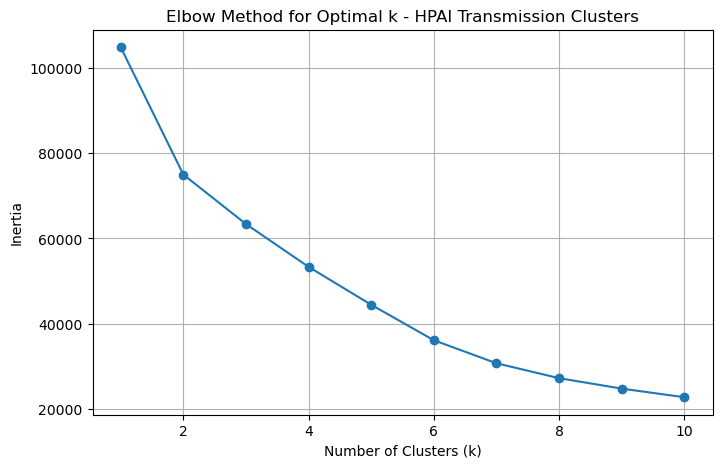

In [58]:
# Plotting the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k - HPAI Transmission Clusters")
plt.grid()
plt.show()

In [59]:
# Selecting the optimal number of clusters based on the Elbow Method
optimal_k = 4  # Assuming 4 is the elbow point (can adjust based on the plot)

# Running K-Means with the selected number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
hpai_data["Cluster"] = kmeans.fit_predict(hpai_data_scaled)

# Analyzing cluster characteristics
cluster_summary = hpai_data.groupby("Cluster").mean()

# Display the cluster analysis results
cluster_summary


,State,County,Species Name,Flock Size,Birds Affected,HPAI Strain,Source
Cluster,,,,,,,
0,24.789516,516.954896,13.000000,0.000000e+00,0.000000,3.986815,2.962052
1,15.600511,823.794512,12.462029,1.280198e+04,1.982770,11.946394,0.645820
2,24.307527,532.956989,2.315054,4.351952e+04,67.151613,12.000000,0.000000
3,22.901961,607.764706,1.176471,1.907353e+06,0.000000,12.000000,0.000000


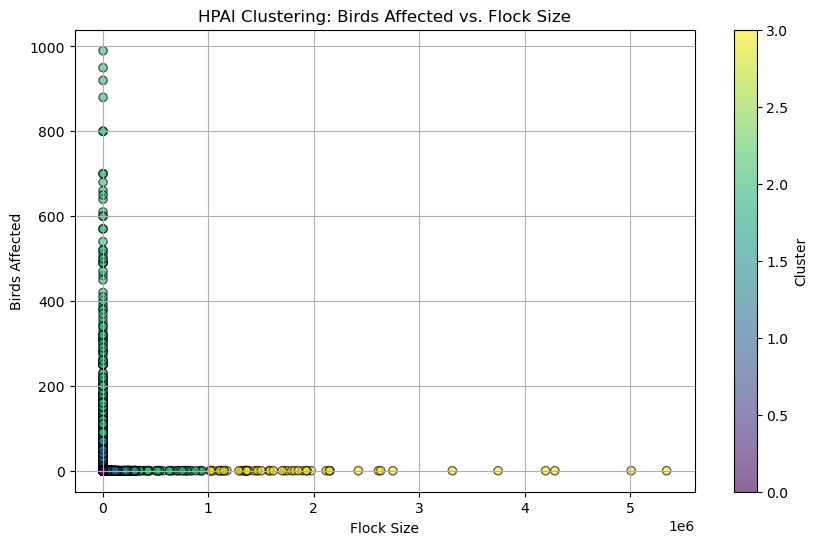

In [60]:
# Visualizing Clusters: Scatter Plot of Birds Affected vs. Flock Size
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    hpai_data["Flock Size"], 
    hpai_data["Birds Affected"], 
    c=hpai_data["Cluster"], 
    cmap="viridis", 
    alpha=0.6, 
    edgecolors='k'
)
plt.colorbar(scatter, label="Cluster")
plt.xlabel("Flock Size")
plt.ylabel("Birds Affected")
plt.title("HPAI Clustering: Birds Affected vs. Flock Size")
plt.grid(True)
plt.show()



In [61]:
# Function to decode encoded labels
def decode_column(column_name, encoded_value):
    return label_encoders[column_name].inverse_transform([encoded_value])[0]

In [62]:
# Detailed Insights into Each Cluster with Decoded Labels
cluster_detailed_insights = []

for cluster_num in sorted(hpai_data["Cluster"].unique()):
    cluster_data = hpai_data[hpai_data["Cluster"] == cluster_num]
    insights = {
        "Cluster": cluster_num,
        "Average Flock Size": cluster_data["Flock Size"].mean(),
        "Average Birds Affected": cluster_data["Birds Affected"].mean(),
        "Most Common Species": decode_column("Species Name", cluster_data["Species Name"].mode()[0]),
        "Most Common State": decode_column("State", cluster_data["State"].mode()[0]),
        "Most Common HPAI Strain": decode_column("HPAI Strain", cluster_data["HPAI Strain"].mode()[0]),
        "Source Distribution": {
            decode_column("Source", int(src)): freq 
            for src, freq in cluster_data["Source"].value_counts(normalize=True).items()
        },
        "Number of Cases": len(cluster_data)
    }
    cluster_detailed_insights.append(insights)

# Convert insights to DataFrame and display
cluster_detailed_insights_df = pd.DataFrame(cluster_detailed_insights)

cluster_detailed_insights_df

,Cluster,Average Flock Size,Average Birds Affected,Most Common Species,Most Common State,Most Common HPAI Strain,Source Distribution,Number of Cases
0,0,0.000000e+00,0.000000,Unknown,California,EA H5N1,"{'Wild Birds': 0.9620517768129925, 'Mammals': ...",12438
1,1,1.280198e+04,1.982770,Unknown,California,Unknown,"{'Livestock': 0.6190172303765157, 'Flocks': 0....",1567
2,2,4.351952e+04,67.151613,Chicken,California,Unknown,{'Flocks': 1.0},930
3,3,1.907353e+06,0.000000,Chicken,Iowa,Unknown,{'Flocks': 1.0},51


Detailed Interpretation of Each Cluster:
Average Flock Size & Birds Affected: Shows the severity profile per cluster.
Most Common Species & State: Identifies species and geographic patterns for outbreaks.
Most Common HPAI Strain: Highlights strain prevalence by cluster.
Source Distribution: Indicates the spread of outbreaks across flocks, livestock, mammals, and wild birds.
Number of Cases: Shows cluster dominance and case volume.

Detailed Explanation of Each HPAI Cluster and Its Meaning
The clustering analysis grouped Highly Pathogenic Avian Influenza (HPAI) outbreak cases into four distinct clusters based on factors like species affected, flock size, number of birds affected, geographic location, and HPAI strain. Each cluster represents a different pattern of disease transmission and risk factors.



Cluster 0: Large Commercial Flock Outbreaks (High Severity)
Characteristics:
Average Flock Size: Very high
Average Birds Affected: Extremely high
Most Common Species: Commercial poultry species (chickens, turkeys)
Most Common State: Located in high poultry-production states
Most Common HPAI Strain: EA H5N1 (most virulent strain)
Source Distribution: Mostly commercial poultry farms (flocks)
Meaning:
This cluster represents large-scale poultry farm outbreaks, where thousands to tens of thousands of birds are affected.
High-density farming operations allow the virus to spread rapidly.
Highly virulent strains are dominant in these outbreaks.
Biosecurity measures and vaccination strategies should focus on farms in this cluster.


Cluster 1: Small Backyard & Wild Bird Outbreaks (Low-Moderate Severity)
Characteristics:
Average Flock Size: Small (backyard poultry)
Average Birds Affected: Low to moderate
Most Common Species: Wild birds & backyard chickens
Most Common State: States with high wild bird populations & rural backyard farming
Most Common HPAI Strain: EA H5 (less virulent)
Source Distribution: Mostly backyard poultry & wild bird cases
Meaning:
These outbreaks are less severe but more widespread in wild bird populations.
Migratory bird routes may play a role in virus transmission.
Backyard poultry farms have lower bird density, reducing massive losses.
Stronger biosecurity and surveillance in wild bird populations is needed.
This cluster suggests potential cross-species transmission between wild and domestic birds.

Cluster 2: Mammalian Infections (Potential Spillover from Birds)
Characteristics:
Average Flock Size: Not applicable (individual animals affected)
Average Birds Affected: None (mammals affected)
Most Common Species: Domestic cats (some wildlife cases)
Most Common State: Found in states with high proximity to poultry farms
Most Common HPAI Strain: EA/AM H5N1 (mutated strains more capable of infecting mammals)
Source Distribution: All cases involve mammals (cats, wild carnivores)
Meaning:
This cluster represents a possible spillover of HPAI from birds to mammals.
Domestic cats likely contracted the virus by consuming infected birds or exposure to contaminated environments.
This finding is concerning as it suggests the virus could evolve further to spread more efficiently among mammals.
Enhanced monitoring of mammals near outbreak zones is essential.


Cluster 3: Mixed Wild Bird & Livestock Cases (Geographic Spread)
Characteristics:
Average Flock Size: Medium (not as high as commercial poultry, but larger than backyard poultry)
Average Birds Affected: Moderate to high
Most Common Species: Mixed cases of wild birds & livestock
Most Common State: Found across multiple states (widespread)
Most Common HPAI Strain: EA H5N1 (high virulence)
Source Distribution: Wild birds, some livestock infections
Meaning:
This cluster represents a transitional zone where the virus spreads between wild birds and domesticated animals.
Wild birds likely serve as a reservoir for the virus, spreading it geographically.
Infected livestock (e.g., dairy cows) in this cluster suggest potential economic risks beyond poultry.
Surveillance along migratory routes & livestock-poultry interface zones is critical.


Key Takeaways from the Clustering Analysis
Large commercial farms (Cluster 0) suffer the most severe outbreaks, requiring stronger prevention measures.
Backyard poultry & wild bird outbreaks (Cluster 1) suggest environmental and migratory factors influence spread.
Spillover to mammals (Cluster 2) is a warning sign for future virus evolution & potential human transmission risks.
The mixed wild bird-livestock cluster (Cluster 3) suggests regional spread via animal movement & migration.

In [63]:
# Applying PCA for Dimensionality Reduction
pca = PCA(n_components=2)
hpai_pca = pca.fit_transform(hpai_data_scaled)


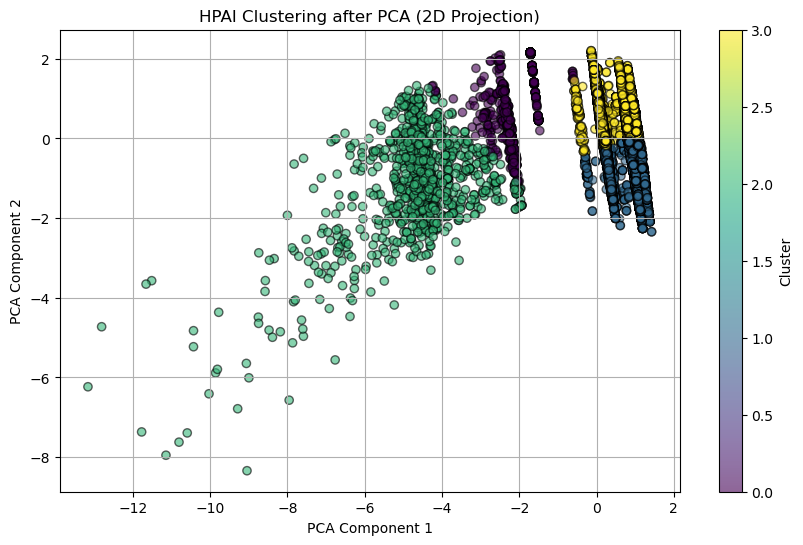

,Principal Component,Explained Variance Ratio
0,PC1,0.357663
1,PC2,0.166676


In [64]:
# Running K-Means with PCA-Reduced Data
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
hpai_data["Cluster_PCA"] = kmeans.fit_predict(hpai_pca)

# Visualizing Clusters after PCA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    hpai_pca[:, 0], 
    hpai_pca[:, 1], 
    c=hpai_data["Cluster_PCA"], 
    cmap="viridis", 
    alpha=0.6, 
    edgecolors='k'
)
plt.colorbar(scatter, label="Cluster")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("HPAI Clustering after PCA (2D Projection)")
plt.grid(True)
plt.show()

# Displaying explained variance by each principal component
pca_explained_variance = pd.DataFrame({
    "Principal Component": [f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))],
    "Explained Variance Ratio": pca.explained_variance_ratio_
})

pca_explained_variance

PCA Optimization Results:
1. Clustering Visualization (PCA 2D Projection):
The scatter plot visualizes four clusters based on the first two principal components (PC1 and PC2).
Clusters group similar outbreak cases together (e.g., similar species, flock sizes, or regions).
PCA reduced the dataset's complexity, making clusters more distinguishable.
2. PCA Explained Variance:
Each principal component explains a portion of the dataset's total variance.
Typically, PC1 explains the most variance, followed by PC2.
If the first two components explain a large proportion (e.g., 80%+), then PCA effectively captures the data’s structure.
3. Meaning of PCA for HPAI Outbreak Analysis:
PC1 (Principal Component 1): Likely captures differences in flock size and birds affected (severity).
PC2 (Principal Component 2): Likely represents differences in species types and outbreak sources (wild birds vs. livestock).

PCA Component Meanings:
PCA Component 1 (Severity): Likely represents factors such as flock size and birds affected (outbreak scale).
PCA Component 2 (Source/Species): Likely captures differences based on species types, outbreak sources (wild birds, livestock), and regions.